In [63]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt

In [26]:
Scoring_shootout= Path("Resources/ScoringShootout.csv")
Scoring_shootout_df= pd.read_csv(Scoring_shootout)
Scoring_shootout_df

,playerID,year,stint,tmID,S,G,GDG
0,adamske01,2006,1,PHO,1,0,0
1,afanadm01,2005,1,TBL,1,0,0
2,afanadm01,2006,1,TBL,2,1,1
3,afinoma01,2005,1,BUF,5,3,2
4,afinoma01,2006,1,BUF,6,2,1
...,...,...,...,...,...,...,...
2067,zubruda01,2005,1,WAS,2,1,0
2068,zubruda01,2006,1,WAS,1,0,0
2069,zubruda01,2007,1,NJD,1,0,0
2070,zuccama01,2010,1,NYR,9,5,3


In [61]:
#scoring_s_y= Scoring_shootout_df.filter(['year'], axis=1)
#sv= scoring_s_y.drop_duplicates("year", keep='first')
#sv= sv.sort_values('year', ascending=True)
#scoring_final= sv.set_index('year')
#scoring_final

In [4]:
Scoring_shootout_df['year'].unique()

array([2006, 2005, 2007, 2009, 2008, 2010, 2011], dtype=int64)

In [5]:
#Calculating the number of games that teams played in a shoutout per year
#Year1= Scoring_shootout_df.loc[Scoring_shootout_df['year'] ==2005,'S'].sum()
#Year2= Scoring_shootout_df.loc[Scoring_shootout_df['year'] ==2006,'S'].sum()
#Year3= Scoring_shootout_df.loc[Scoring_shootout_df['year'] ==2007,'S'].sum()
#Year4= Scoring_shootout_df.loc[Scoring_shootout_df['year'] ==2008,'S'].sum()
#Year5= Scoring_shootout_df.loc[Scoring_shootout_df['year'] ==2009,'S'].sum()
#Year6= Scoring_shootout_df.loc[Scoring_shootout_df['year'] ==2010,'S'].sum()
#Year7= Scoring_shootout_df.loc[Scoring_shootout_df['year'] ==2011,'S'].sum()
                                           


In [53]:
#calculate the max number of Shoutout games played  by individual player-creating a pivot table that filter the max number per team per year
result_df = Scoring_shootout_df.pivot_table(index='tmID', columns='year', values='S', aggfunc='max')
result_df=result_df.dropna()
result_df


year,2005,2006,2007,2008,2009,2010,2011
tmID,,,,,,,
BOS,9.0,11.0,13.0,8.0,13.0,8.0,6.0
BUF,6.0,14.0,12.0,11.0,9.0,6.0,5.0
CAL,9.0,7.0,5.0,5.0,9.0,16.0,3.0
CAR,9.0,5.0,4.0,6.0,9.0,10.0,2.0
CBS,9.0,9.0,10.0,11.0,12.0,12.0,4.0
CHI,5.0,10.0,9.0,10.0,15.0,11.0,6.0
COL,7.0,8.0,8.0,13.0,8.0,6.0,6.0
DAL,13.0,12.0,6.0,11.0,16.0,12.0,5.0
DET,7.0,10.0,10.0,10.0,14.0,7.0,5.0


In [57]:
Year1_sum = result_df[2005].sum()
Year2_sum = result_df[2006].sum()
Year3_sum = result_df[2007].sum()
Year4_sum = result_df[2008].sum()
Year5_sum = result_df[2009].sum()
Year6_sum = result_df[2010].sum()
Year7_sum = result_df[2011].sum()

In [60]:
Scoring_per_year=({"2005":Year1_sum, 
                          "2006": Year2_sum, 
                          "2007": Year3_sum, 
                          "2008": Year4_sum,
                          "2009": Year5_sum,
                          "2010": Year6_sum,
                          "2011": Year7_sum,
                          })
print(Scoring_per_year)

# Convert the dictionary to a DataFrame

Scoring_shootout_df= pd.DataFrame.from_dict(Scoring_per_year, orient='index', columns=['Value'])

# Reset the index to have 'Year' as a separate column
Scoring_shootout_df.reset_index(inplace=True)
Scoring_shootout_df.columns = ['Year', 'Value']

# Display the resulting DataFrame
Scoring_shootout_df

{'2005': 227.0, '2006': 275.0, '2007': 247.0, '2008': 250.0, '2009': 301.0, '2010': 247.0, '2011': 140.0}


,Year,Value
0,2005,227.0
1,2006,275.0
2,2007,247.0
3,2008,250.0
4,2009,301.0
5,2010,247.0
6,2011,140.0


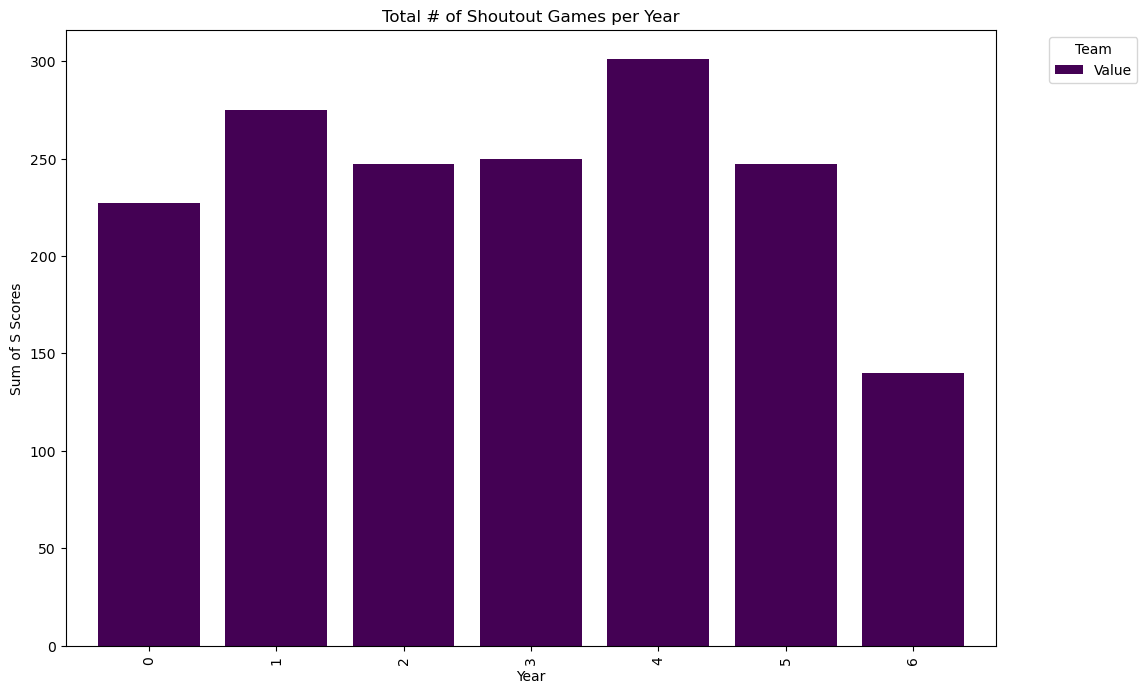

In [79]:
Scoring_shootout_df.plot(kind='bar', colormap='viridis', width=0.8, figsize=(12, 8))

# Set up plot labels and legend
plt.title('Total # of Shoutout Games per Year')
plt.xlabel('Year')
plt.ylabel('Sum of S Scores')
plt.legend(title='Team', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [49]:
Year1 = Scoring_shootout_df[Scoring_shootout_df['year'] == 2005].groupby('tmID')['S'].max()
Year2 = Scoring_shootout_df[Scoring_shootout_df['year'] == 2006].groupby('tmID')['S'].max()
Year3 = Scoring_shootout_df[Scoring_shootout_df['year'] == 2007].groupby('tmID')['S'].max()
Year4 = Scoring_shootout_df[Scoring_shootout_df['year'] == 2008].groupby('tmID')['S'].max()
Year5 = Scoring_shootout_df[Scoring_shootout_df['year'] == 2009].groupby('tmID')['S'].max()
Year6 = Scoring_shootout_df[Scoring_shootout_df['year'] == 2010].groupby('tmID')['S'].max()
Year7 = Scoring_shootout_df[Scoring_shootout_df['year'] == 2011].groupby('tmID')['S'].max()


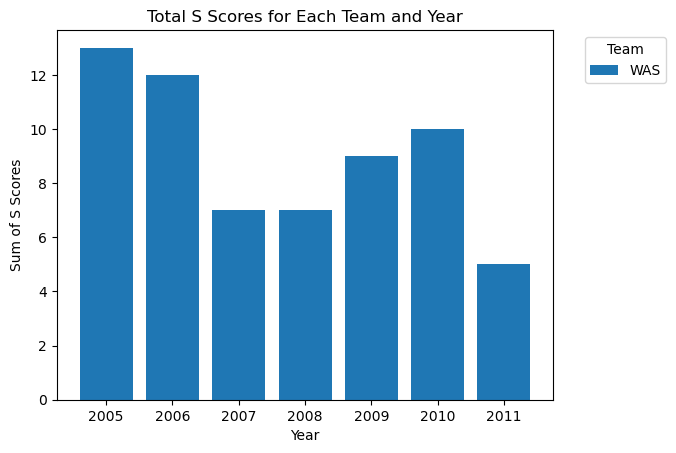

In [64]:
for tmID in result_df.index:
    team_data = result_df.loc[tmID]
    
    # Create a bar graph for each team

plt.bar(team_data.index, team_data.values, label=tmID)

# Set up plot labels and legend
plt.title('Total S Scores for Each Team and Year')
plt.xlabel('Year')
plt.ylabel('Sum of S Scores')
plt.legend(title='Team', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

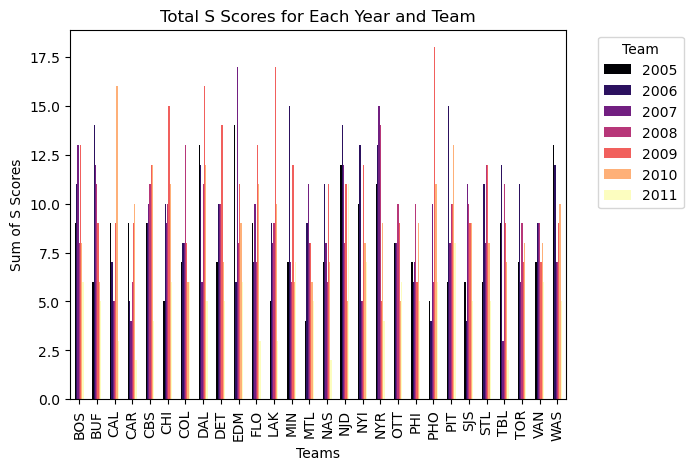

In [75]:
# Calculate the sum of 'S' for each year
year_sums = result_df.sum()

# Plot the clustered bar graph for all teams with different color bars for each team
result_df.plot(kind='bar', colormap='magma')

# Set the size of the graph
#figsize=(20, 20)

# Set up plot labels and legend
plt.title('Total S Scores for Each Year and Team')
plt.xlabel('Teams')
plt.ylabel('Sum of S Scores')
plt.legend(title='Team', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()